# Comparación con los modelos clásicos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

from EpidemiologicalModels.CompartmentalModelsInEDOS import *
from EpidemiologicalModels.DefineSpaceInCA import *
from EpidemiologicalModels.epidemiologicalModels import *

Ejecute solo una de las siguientes secciones para dejar la configuración por defecto de los modelos epidemiológicos clásicos (SIS, SIR y sus variaciones):

In [2]:
def orderDefinition(numberOfElements, numberOfCategories):
    categories = [(i % numberOfElements) * numberOfCategories for i in range(numberOfElements)]
    groups = [[j,i] for i in range(numberOfElements) for j in categories]
    return groups

def ShowEvolutions(evolutions,steps = 30, categorizer = 5):
    numberOfEvolutions = len(evolutions)
    order = orderDefinition(numberOfEvolutions, categorizer)
    for i in range(numberOfEvolutions**2):
        plt.subplot(numberOfEvolutions,numberOfEvolutions,i+1)
        if i in range(numberOfEvolutions):
            plt.title(f"t = {i*5}")
        evolutions[order[i][1]].evolutionsPlot(steps,order[i][0])
    plt.show()

In [67]:
# Modelos compartimentales clásicos
# Parámetros
alpha =  0.2; mu = 1/(75*6); theta = 0.4; 
beta = 0.5

# Modelos SIS
def S_function(values, beta = beta, mu = mu, theta = theta):
    S = values[0]; I = values[1]
    return mu*(1 - S) + (1 - theta)*alpha*I - beta*S*I

def I_function(values, alpha = alpha, beta = beta, mu = mu, theta = theta):
    S = values[0]; I = values[1]
    return beta*S*I - (1 - theta)*alpha*I - mu*I

model = "SIS"
initialValues = [0.9, 0.1]  # S0 = 0.9; I0 = 0.1
variables = ["Susceptibles", "Infectados"]
colors = ["y", "r"]  
listOfFunctions = [S_function, I_function]
locations = ["northwest", "north", "northeast", "west", "center", "east", "southwest", "south", "southeast", "random"]

In [68]:
# Modelos SIR
def S_function(values, beta=beta, mu = mu, theta = theta):
    S = values[0]; I = values[1]
    return mu*(1 - S) - beta*S*I + alpha*theta*I

def I_function(values, alpha=alpha, beta=beta, mu = mu, theta = theta):
    S = values[0]; I = values[1]
    return beta*S*I - I*(alpha + mu)

def R_function(values, alpha=alpha, mu = mu, theta = theta):
    I = values[1]; R = values[2]
    return (1 - theta)*alpha*I - mu*R

model = "SIR"
initialValues = [0.9, 0.1, 0]  # S0 = 0.9; I0 = 0.1; R0 = 0
variables = ["Susceptibles", "Infectados", "Recuperados"]
colors = ["y", "r", "g"]  
listOfFunctions = [S_function, I_function, R_function]
locations = ["northwest", "north", "northeast", "west", "center", "east", "southwest", "south", "southeast", "random"]
locationsColors = ["g","gold","peru","c","magenta","darkorange","royalblue","mediumorchid","r","lime"]

Script de ejecución del modelo en ecuaciones diferenciales:

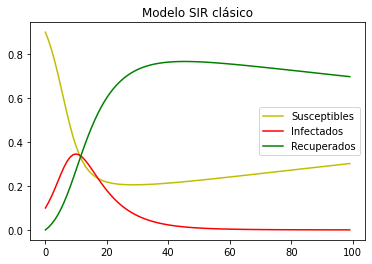

In [70]:
discreteSolutions = CompartmentalModelsInEDOS(listOfFunctions, initialValues)
discreteSolutions.n_iterations(100); discreteSolutions.h(1)
discreteSolutions.titlePlot = f"Modelo {model} clásico"
discreteSolutions.plotSolutions(variables, colors)

## Modelos básicos

In [5]:
from EpidemiologicalModels.NeighborhoodManager import *

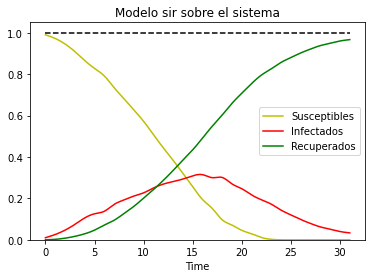

In [7]:
system = initialLocation(30,30,0.1,"center") # northwest, north, northeast, west, center, east, southwest, south, southeast
neigborhoodSystemMoore = Moore(system)

model = "sir"  # sis, sir 
SIRmodel = models(model, alpha, beta, system, neigborhoodSystemMoore, [1,0])
SIRmodel.metricsPlot(30, f"Modelo {model} sobre el sistema") 

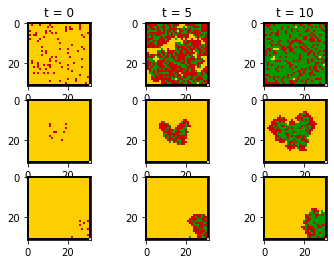

In [8]:
system1 = initialLocation(30,30,0.1,"random")
system2 = initialLocation(30,30,0.1,"center")
system3 = initialLocation(30,30,0.1,"southeast")

evolutions = [models(model, alpha, beta, system1, Von_Neumann(system1)),
              models(model, alpha, beta, system2, Von_Neumann(system2)),
              models(model, alpha, beta, system3, Von_Neumann(system3))]

ShowEvolutions(evolutions)

In [9]:
casesStudied = []
for l in locations:
    system = initialLocation(30,30,0.1,l)
    neigborhoodSystemMoore = Von_Neumann(system)
    case = models(model, alpha, beta, system, neigborhoodSystemMoore, [1,0])
    casesStudied.append(case.basicModel(10))

state = 0 # 0, 1, 2

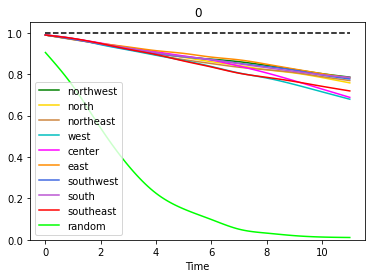

In [10]:
from EpidemiologicalModels.tools import *

graficas([c[0][state] for c in casesStudied],locations,locationsColors,state)

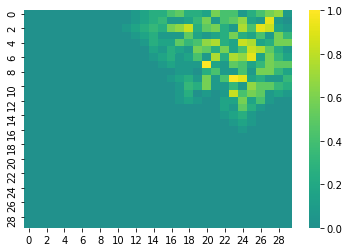

In [11]:
heatmap(casesStudied[2][2],1)  # evolutions - location - state

## Modelos con natalidad y mortalidad

In [20]:
from EpidemiologicalModels.BirthAndMortavilityModel import *

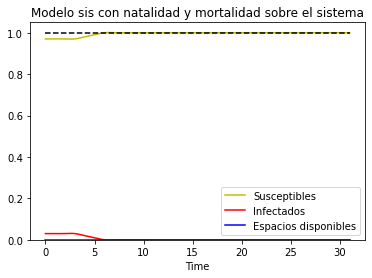

In [58]:
ranges = [[1,100,1]]
mr = [[1,100,1/(75*6)]]  # [[1,14,0.0005],[15,69,0.02],[70,100,0.15]]
br = 1/(75*6)

system = initialLocation(10,10,0.25,"center") # northwest, north, northeast, west, center, east, southwest, south, southeast
neigborhoodSystemMoore = Von_Neumann(system)
ages_sys1 = agesMatrix(ranges,system)

model = "sis_birthAndMortavility"  # sis_birthAndMortavility, sir_birthAndMortavility
SISmodel = models(model,alpha,beta,system,neigborhoodSystemMoore,[1,0])
SISmodel.birthRate = br; SISmodel.probabilityOfDyingByAgeGroup = mr
SISmodel.systemAges = ages_sys1; SISmodel.annualUnit = 6
SISmodel.metricsPlot(30, f"Modelo {model[:3]} con natalidad y mortalidad sobre el sistema") 

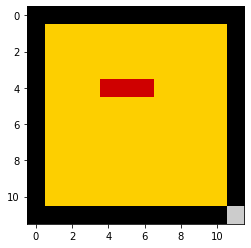

In [59]:
SISmodel.evolutionsPlot(30,1)

In [61]:
ages_sys1

array([[62., 89., 38., 69., 40., 87., 56., 70., 40., 69.],
       [89., 93., 40.,  8., 46., 87., 36., 16., 49., 91.],
       [30., 98., 86., 23., 40., 50., 88., 16., 74., 27.],
       [90., 39.,  6., 23., 23., 88.,  2., 64., 30., 73.],
       [36., 65., 62., 22., 67., 72., 22., 38., 88., 81.],
       [44., 64., 48., 48., 85., 40., 59.,  7., 51., 46.],
       [71., 35., 44., 19., 65., 62.,  6., 31., 17., 88.],
       [90., 64., 35., 40., 73., 30., 64., 48., 73., 31.],
       [91., 56., 57.,  8., 89., 99., 20., 73., 12., 19.],
       [90.,  5.,  7., 51., 62., 67., 25., 36., 44., 19.]])

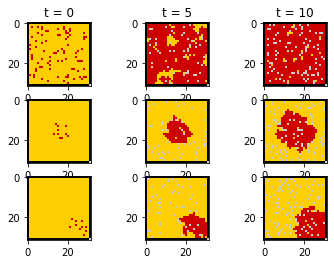

In [19]:
system1 = initialLocation(30,30,0.1,"random")
system2 = initialLocation(30,30,0.1,"center")
system3 = initialLocation(30,30,0.1,"southeast")

evolutions = [models(model, alpha, beta, system1, Von_Neumann(system1), [1,0]),
              models(model, alpha, beta, system2, Von_Neumann(system2), [1,0]),
              models(model, alpha, beta, system3, Von_Neumann(system3), [1,0])]

for evolution in evolutions:
    evolution.birthRate = br; evolution.probabilityOfDyingByAgeGroup = mr
    evolution.systemAges = ages_sys1; evolution.annualUnit = 365

ShowEvolutions(evolutions)

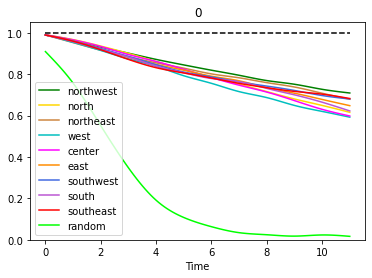

In [20]:
casesStudied = []
for l in locations:
    system = initialLocation(30,30,0.1,l)
    neigborhoodSystemMoore = Von_Neumann(system)
    case = models(model, alpha, beta, system,neigborhoodSystemMoore, [1,0])
    case.birthRate = br; case.probabilityOfDyingByAgeGroup = mr
    case.systemAges = ages_sys1; case.annualUnit = 365
    casesStudied.append(case.basicModel(10))

state = 0 # 0, 1, 2, 3
graficas([c[0][state] for c in casesStudied],locations,locationsColors,state)

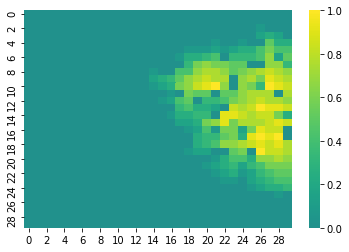

In [21]:
heatmap(casesStudied[5][2],1)  # location - evolutions - state

## Modelos con muerte por enfermedad

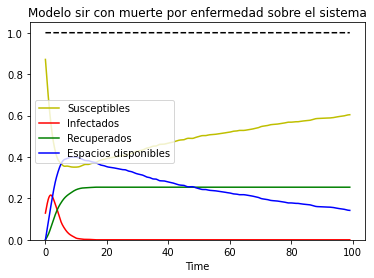

In [72]:
ranges = [[1,100,1]]
#mr = [[1,100,0.05]]
ranges_dead = [[1,100,0.4]]
#br = 2

#ages_sys1 = agesMatrix(ranges,system)
neigborhoodSystemMoore = Von_Neumann(system)

model = "sir_deathByDisease"  # sis_deathByDisease, sir_deathByDisease
SIRmodel = models(model, alpha, beta, system, neigborhoodSystemMoore, [1,0])
SIRmodel.birthRate = br; SIRmodel.probabilityOfDyingByAgeGroup = mr
SIRmodel.deathFromDiseaseByAgeRange = ranges_dead
SIRmodel.systemAges = ages_sys1; SIRmodel.annualUnit = 6

SIRmodel.plotMediumCurves(0.1, 100, 10, f"Modelo {model[:3]} con muerte por enfermedad sobre el sistema")
#SIRmodel.metricsPlot(100, f"Modelo {model[:3]} con muerte por enfermedad sobre el sistema") 

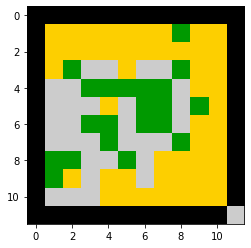

In [84]:
SIRmodel.evolutionsPlot(100,9)

In [74]:
ages_sys1

array([[62., 89., 38., 69., 40., 87., 56., 70., 40., 69.],
       [89., 93., 40.,  8., 46., 87., 36., 16., 49., 91.],
       [30., 98., 86., 23., 40., 50., 88., 16., 74., 27.],
       [90., 39.,  6., 23., 23., 88.,  2., 64., 30., 73.],
       [36., 65., 62., 22., 67., 72., 22., 38., 88., 81.],
       [44., 64., 48., 48., 85., 40., 59.,  7., 51., 46.],
       [71., 35., 44., 19., 65., 62.,  6., 31., 17., 88.],
       [90., 64., 35., 40., 73., 30., 64., 48., 73., 31.],
       [91., 56., 57.,  8., 89., 99., 20., 73., 12., 19.],
       [90.,  5.,  7., 51., 62., 67., 25., 36., 44., 19.]])

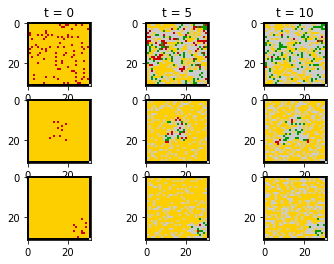

In [23]:
system1 = initialLocation(30,30,0.1,"random")
system2 = initialLocation(30,30,0.1,"center")
system3 = initialLocation(30,30,0.1,"southeast")

evolutions = [models(model, alpha, beta, system1, Von_Neumann(system1), [1,0]),
              models(model, alpha, beta, system2, Von_Neumann(system2), [1,0]),
              models(model, alpha, beta, system3, Von_Neumann(system3), [1,0])]

for evolution in evolutions:
    evolution.birthRate = br; evolution.probabilityOfDyingByAgeGroup = mr
    evolution.systemAges = ages_sys1; evolution.annualUnit = 365
    evolution.deathFromDiseaseByAgeRange = ranges_dead

ShowEvolutions(evolutions)

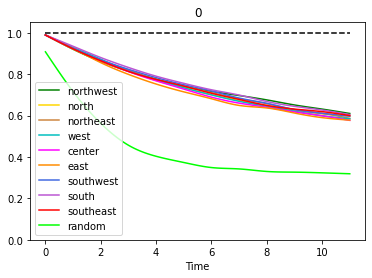

In [24]:
casesStudied = []
for l in locations:
    system = initialLocation(30,30,0.1,l)
    neigborhoodSystemMoore = Von_Neumann(system)
    case = models(model, alpha, beta, system, neigborhoodSystemMoore, [1,0])
    case.birthRate = br; case.probabilityOfDyingByAgeGroup = mr
    case.systemAges = ages_sys1; case.annualUnit = 365
    case.deathFromDiseaseByAgeRange = ranges_dead
    casesStudied.append(case.basicModel(10))

state = 0 # 0, 1, 2, 3
graficas([c[0][state] for c in casesStudied],locations,locationsColors,state)

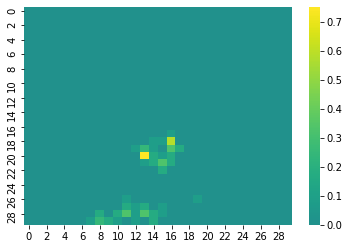

In [25]:
heatmap(casesStudied[7][2],1)  # location - evolutions - state